## R scripts to create interpolated PR-Curves

In [18]:
#!install.packages("PRROC")
require("PRROC")

In [24]:

df_min3 = read.csv("../Dataset/Text-Data/RP-Crowd-2-folds.csv")

## load labels and cast to int
y_dat = df_min3["label"]
#y_dat_min2 = y_dat.astype(int)

## test data filter
#filter_q_min2 =  df_min2['ten_folds'] < 8 


bert_min_2 = read.csv("Language Model-Results/gbert-base-double-head-unfrozen-RP-Crowd-2-folds-a0.9_best.pickle.json")[[3]]
bert_min_3 = read.csv("Language Model-Results/gbert-base-double-head-unfrozen-RP-Crowd-3-folds-a0.9_best.pickle.json")[[3]]
bert_mod = read.csv("Language Model-Results/gbert-base-double-head-unfrozen-RP-Mod-folds-a0.9_best.pickle.json")[[3]]

## crosseval
rp2_derstandard = read.csv("Cross-Evaluation-Results/cross_eval_gbert-base-double-head-unfrozen-RP-Crowd-2-folds-a0.9_on_derstandard.pickle.json")[[3]]
rp3_derstandard = read.csv("Cross-Evaluation-Results/cross_eval_gbert-base-double-head-unfrozen-RP-Crowd-3-folds-a0.9_on_derstandard.pickle.json")[[3]]
rpmod_derstandard = read.csv("Cross-Evaluation-Results/cross_eval_gbert-base-double-head-unfrozen-RP-Mod-folds-a0.9_on_derstandard.pickle.json")[[3]]
derstandard_derstandard = read.csv("Cross-Evaluation-Results/gbert-base-double-head-unfrozen-derstandard-folds-a0.9_best.pickle.json")[[3]]



In [25]:
resultstf_min2 =c("nb_abusive_min_2_tfidf.p.json","logreg_abusive_min_2_tfidf.p.json","xg_abusive_min_2_tfidf.p.json","automl_abusive_min_2_tfidf.p.json")
results_embed_min2=c("nb_abusive_min_2_embed.p.json","logreg_abusive_min_2_embed.p.json","xg_abusive_min_2_embed.p.json","automl_abusive_min_2_embed.p.json")

resultstf_min3 =c("nb_abusive_min_3_tfidf.p.json","logreg_abusive_min_3_tfidf.p.json","xg_abusive_min_3_tfidf.p.json","automl_abusive_min_3_tfidf.p.json")
results_embed_min3=c("nb_abusive_min_3_embed.p.json","logreg_abusive_min_3_embed.p.json","xg_abusive_min_3_embed.p.json","automl_abusive_min_3_embed.p.json")

resultstf_mod =c("nb_abusive_mod_tfidf.p.json","logreg_abusive_mod_tfidf.p.json","xg_abusive_mod_tfidf.p.json","automl_abusive_mod_tfidf.p.json")
results_embed_mod=c("nb_abusive_mod_embed.p.json","logreg_abusive_mod_embed.p.json","xg_abusive_mod_embed.p.json","automl_abusive_mod_embed.p.json")



min2_tf_baseline = sapply(resultstf_min2,function(x){
    return (read.csv(paste("Best-Baseline-Results/",x,sep=""))[[3]])
})

min2_emb_baseline = sapply(results_embed_min2,function(x){
    return (read.csv(paste("Best-Baseline-Results/",x,sep=""))[[3]])
})



min3_tf_baseline = sapply(resultstf_min3,function(x){
    return (read.csv(paste("Best-Baseline-Results/",x,sep=""))[[3]])
})

min3_emb_baseline = sapply(results_embed_min3,function(x){
    return (read.csv(paste("Best-Baseline-Results/",x,sep=""))[[3]])
})

mod_tf_baseline = sapply(resultstf_mod,function(x){
    return (read.csv(paste("Best-Baseline-Results/",x,sep=""))[[3]])
})

mod_emb_baseline = sapply(results_embed_mod,function(x){
    return (read.csv(paste("Best-Baseline-Results/",x,sep=""))[[3]])
})






In [21]:
bert_min_2
min2_tf_baseline

[1] 0.948922217 0.024620784 0.971952915 0.030366637 0.766124725 0.088347919
   [7] 0.986796141 0.398798555 0.855602920 0.238915354 0.251746655 0.481572807
  [13] 0.926494718 0.016180214 0.719063163 0.105531260 0.132551491 0.622754812
  [19] 0.993158042 0.011960525 0.586289167 0.145802572 0.963901341 0.080276713
  [25] 0.867302716 0.286509991 0.641601443 0.407448053 0.708384931 0.012646983
  [31] 0.915684938 0.270733327 0.831922650 0.428546727 0.843055189 0.432678640
  [37] 0.416063696 0.135676518 0.613579452 0.693821549 0.984469235 0.103471495
  [43] 0.921316504 0.392857879 0.888483226 0.064421266 0.479378164 0.665639222
  [49] 0.141271517 0.076825596 0.556327343 0.105427898 0.975437999 0.019220635
  [55] 0.985354304 0.099063039 0.146894082 0.036914136 0.738542378 0.175412044
  [61] 0.842392087 0.027489886 0.562863111 0.016559003 0.299871266 0.304777145
  [67] 0.826076627 0.070447445 0.758336306 0.929614902 0.097773485 0.050129868
  [73] 0.819835782 0.467936665 0.861413538 0.082288943 0.755208611 0.012353392
  [79] 0.126281977 0.664352357 0.726598918 0.119591109 0.046686932 0.929040313
  [85] 0.923209667 0.006687457 0.867801487 0.088590629 0.984319866 0.479087830
  [91] 0.221275672 0.005053945 0.168207228 0.769996822 0.368998855 0.013737096
  [97] 0.876181483 0.024302561 0.768608332 0.053423889 0.767624497 0.006689354
 [103] 0.964464426 0.215491325 0.477930576 0.039640401 0.952081025 0.330708742
 [109] 0.707238615 0.800564647 0.873677731 0.420968443 0.944281101 0.251873791
 [115] 0.685561478 0.062937535 0.605470896 0.112410694 0.914464653 0.648679614
 [121] 0.625833869 0.704382718 0.906147122 0.039600898 0.763584077 0.376329213
 [127] 0.740834296 0.649255574 0.440963447 0.684307933 0.988660455 0.146293372
 [133] 0.698796272 0.359129041 0.970336795 0.752398074 0.906494737 0.096046261
 [139] 0.741695046 0.735976338 0.912030280 0.486149371 0.955493391 0.016281577
 [145] 0.693485439 0.085395478 0.346176475 0.325451374 0.888643801 0.389709711
 [151] 0.556253970 0.326097578 0.919685423 0.081544310 0.921030223 0.830630600
 [157] 0.571935296 0.331280410 0.809760451 0.211533353 0.860932171 0.073035106
 [163] 0.505091965 0.024078410 0.213367805 0.009273637 0.660557210 0.257609993
 [169] 0.509417951 0.326182693 0.627780855 0.195923761 0.964207292 0.006731553
 [175] 0.960085511 0.043344650 0.855740726 0.349887758 0.750192285 0.208031848
 [181] 0.627653897 0.676878810 0.990430892 0.414026231 0.276949435 0.164954022
 [187] 0.216802672 0.037164588 0.455950975 0.120896421 0.584600687 0.597739398
 [193] 0.825312495 0.198723108 0.613255918 0.027845690 0.956091285 0.025691340
 [199] 0.495313823 0.018022809 0.919086874 0.123464145 0.934549809 0.061842732
 [205] 0.543857872 0.038529128 0.113449708 0.260315627 0.913358510 0.511692107
 [211] 0.940353870 0.476242155 0.233762503 0.865006387 0.464871109 0.179706782
 [217] 0.823307097 0.473918796 0.387588561 0.252496153 0.860749722 0.394936651
 [223] 0.765909731 0.101539224 0.770365298 0.580160439 0.909641385 0.315908402
 [229] 0.609513819 0.180165619 0.742060661 0.128830180 0.862234950 0.012625485
 [235] 0.949034691 0.015889633 0.293450296 0.328563094 0.818178773 0.353441477
 [241] 0.662880898 0.037201528 0.343637466 0.459154040 0.401743084 0.124132201
 [247] 0.654524505 0.846829772 0.169074014 0.035346951 0.534081399 0.701037645
 [253] 0.835334539 0.531437814 0.982164979 0.029182950 0.952958941 0.536207974
 [259] 0.864242554 0.888531744 0.918074548 0.025065716 0.775276601 0.733925939
 [265] 0.952753425 0.252834141 0.694229186 0.933561027 0.458512068 0.202450395
 [271] 0.910392821 0.229345873 0.777607262 0.024820521 0.740524530 0.003852267
 [277] 0.153557345 0.867465675 0.256565481 0.187319890 0.741331279 0.336075336
 [283] 0.261800557 0.372081965 0.262662560 0.020578401 0.515970230 0.059922427
 [289] 0.880840063 0.043268070 0.938153863 0.628226578 0.972252131 0.724603891
 [295] 0.714788020 0.466987550 0.932633877 0.023686329 0.890856445 0.023166053
 [301] 0.700947940 0.271744490 0.305791914 0.13525699

nb_abusive_min_2_tfidf.p.json,logreg_abusive_min_2_tfidf.p.json,xg_abusive_min_2_tfidf.p.json,automl_abusive_min_2_tfidf.p.json
0.4359631,0.50192332,0.5410886,0.5167537
0.3251690,0.09705818,0.3874824,0.2485460
0.4306926,0.25670110,0.4294505,0.3742141
0.4242650,0.31857911,0.3518273,0.3451459
0.3901106,0.45359405,0.4675893,0.2314579
0.4395129,0.43806547,0.4551198,0.4152690
0.6134073,0.75413128,0.8980501,0.8622301
0.4600746,0.47433199,0.5791962,0.5418168
0.8275020,0.91969469,0.7276011,0.8633285
0.4302014,0.25134147,0.4294505,0.4016304


In [22]:
resultstf_min2

[1] "nb_abusive_min_2_tfidf.p.json"     "logreg_abusive_min_2_tfidf.p.json"
[3] "xg_abusive_min_2_tfidf.p.json"     "automl_abusive_min_2_tfidf.p.json"

In [26]:
df_min2 = read.csv("../Dataset/Text-Data/RP-Crowd-2-folds.csv")

## load labels and cast to int
y_dat = df_min2["label"]
#y_dat_min2 = y_dat.astype(int)

## test data filter
filter_q_min2 =  df_min2['ten_folds'] < 8 




sapply(resultstf_min2,function(x){
    dat = min2_tf_baseline[,x]
    pr = pr.curve(dat, weights.class0 = y_dat[filter_q_min2], curve = TRUE)
    #plot(pr)
    write.table(file=paste("Best-Baseline-Results/",x,"_transformed",sep=""),pr$curve,row.names = FALSE,col.names=FALSE,sep=",")
})


sapply(results_embed_min2,function(x){
    dat = min2_emb_baseline[,x]
    pr = pr.curve(dat, weights.class0 = y_dat[filter_q_min2], curve = TRUE)
    #plot(pr)
    write.table(file=paste("Best-Baseline-Results/",x,"_transformed",sep=""),pr$curve,row.names = FALSE,col.names=FALSE,sep=",")
})


df_min3 = read.csv("../Dataset/Text-Data/RP-Crowd-3-folds.csv")

## load labels and cast to int
y_dat = df_min3["label"]
#y_dat_min2 = y_dat.astype(int)

## test data filter
filter_q_min3 =  df_min3['ten_folds'] < 8 




sapply(resultstf_min3,function(x){
    dat = min3_tf_baseline[,x]
    pr = pr.curve(dat, weights.class0 = y_dat[filter_q_min3], curve = TRUE)
    #plot(pr)
    write.table(file=paste("Best-Baseline-Results/",x,"_transformed",sep=""),pr$curve,row.names = FALSE,col.names=FALSE,sep=",")
})


sapply(results_embed_min3,function(x){
    dat = min3_emb_baseline[,x]
    pr = pr.curve(dat, weights.class0 = y_dat[filter_q_min3], curve = TRUE)
    #plot(pr)
    write.table(file=paste("Best-Baseline-Results/",x,"_transformed",sep=""),pr$curve,row.names = FALSE,col.names=FALSE,sep=",")
})


df_mod = read.csv("../Dataset/Text-Data/RP-Mod-folds.csv")

## load labels and cast to int
y_dat = df_mod["label"]
#y_dat_min2 = y_dat.astype(int)

## test data filter
filter_q_mod =  df_mod['ten_folds'] < 8 




sapply(resultstf_mod,function(x){
    dat = mod_tf_baseline[,x]
    pr = pr.curve(dat, weights.class0 = y_dat[filter_q_mod], curve = TRUE)
    #plot(pr)
    write.table(file=paste("Best-Baseline-Results/",x,"_transformed",sep=""),pr$curve,row.names = FALSE,col.names=FALSE,sep=",")
})


sapply(results_embed_mod,function(x){
    dat = mod_emb_baseline[,x]
    pr = pr.curve(dat, weights.class0 = y_dat[filter_q_mod], curve = TRUE)
    #plot(pr)
    write.table(file=paste("Best-Baseline-Results/",x,"_transformed",sep=""),pr$curve,row.names = FALSE,col.names=FALSE,sep=",")
})





$nb_abusive_min_2_tfidf.p.json
NULL

$logreg_abusive_min_2_tfidf.p.json
NULL

$xg_abusive_min_2_tfidf.p.json
NULL

$automl_abusive_min_2_tfidf.p.json
NULL

$nb_abusive_min_2_embed.p.json
NULL

$logreg_abusive_min_2_embed.p.json
NULL

$xg_abusive_min_2_embed.p.json
NULL

$automl_abusive_min_2_embed.p.json
NULL

$nb_abusive_min_3_tfidf.p.json
NULL

$logreg_abusive_min_3_tfidf.p.json
NULL

$xg_abusive_min_3_tfidf.p.json
NULL

$automl_abusive_min_3_tfidf.p.json
NULL

$nb_abusive_min_3_embed.p.json
NULL

$logreg_abusive_min_3_embed.p.json
NULL

$xg_abusive_min_3_embed.p.json
NULL

$automl_abusive_min_3_embed.p.json
NULL

$nb_abusive_mod_tfidf.p.json
NULL

$logreg_abusive_mod_tfidf.p.json
NULL

$xg_abusive_mod_tfidf.p.json
NULL

$automl_abusive_mod_tfidf.p.json
NULL

$nb_abusive_mod_embed.p.json
NULL

$logreg_abusive_mod_embed.p.json
NULL

$xg_abusive_mod_embed.p.json
NULL

$automl_abusive_mod_embed.p.json
NULL

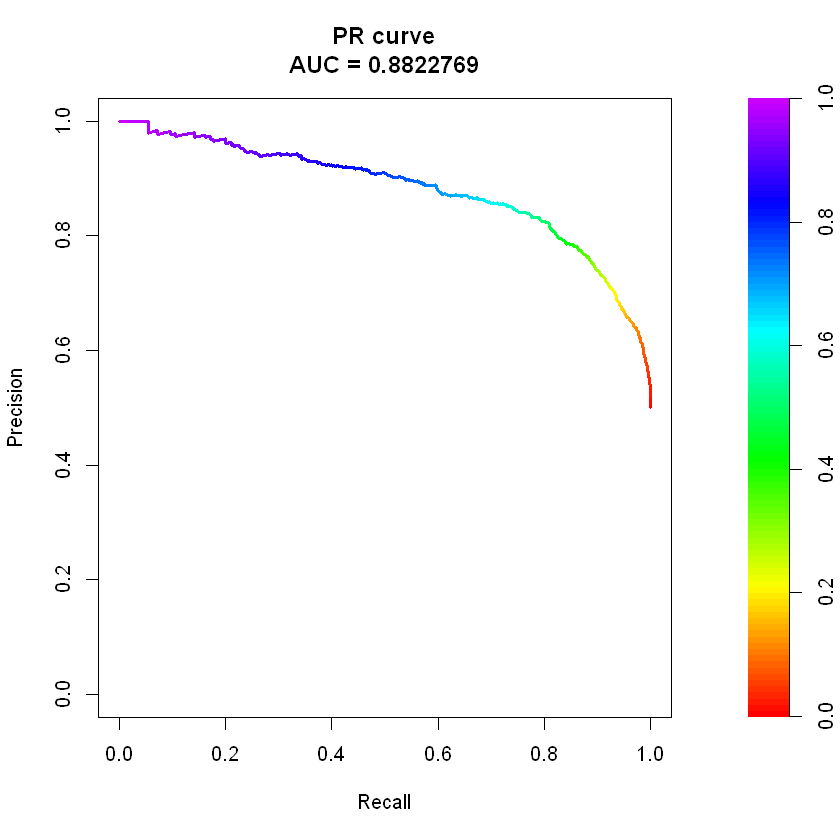

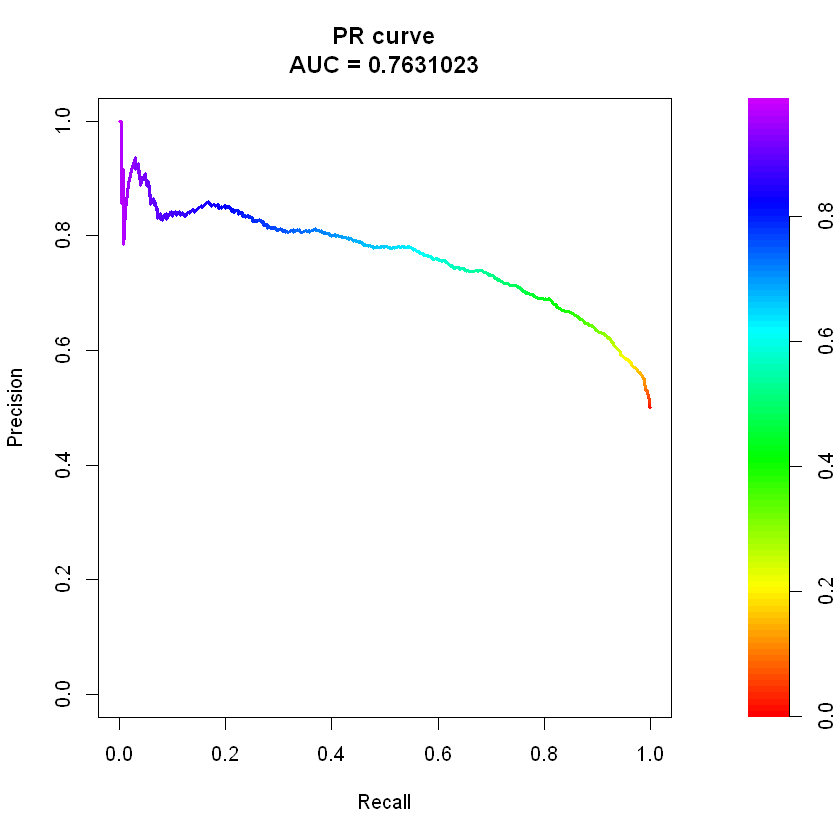

In [27]:
dat = bert_min_2

pr = pr.curve(dat, weights.class0 = y_dat[filter_q_min2], curve = TRUE)
plot(pr)
write.table(file=paste("Language Model-Results/gbert-base-double-head-unfrozen-RP-Crowd-2-folds-a0.9_best.pickle.json_transformed",sep=""),pr$curve,row.names = FALSE,col.names=FALSE,sep=",")

dat = bert_min_3
pr = pr.curve(dat, weights.class0 = y_dat[filter_q_min3], curve = TRUE)
plot(pr)
write.table(file=paste("Language Model-Results/gbert-base-double-head-unfrozen-RP-Crowd-3-folds-a0.9_best.pickle.json_transformed",sep=""),pr$curve,row.names = FALSE,col.names=FALSE,sep=",")


dat = bert_mod
pr = pr.curve(dat, weights.class0 = y_dat[filter_q_mod], curve = TRUE)
plot(pr)
write.table(file=paste("Language Model-Results/gbert-base-double-head-unfrozen-RP-Mod-folds-a0.9_best.pickle.json_transformed",sep=""),pr$curve,row.names = FALSE,col.names=FALSE,sep=",")






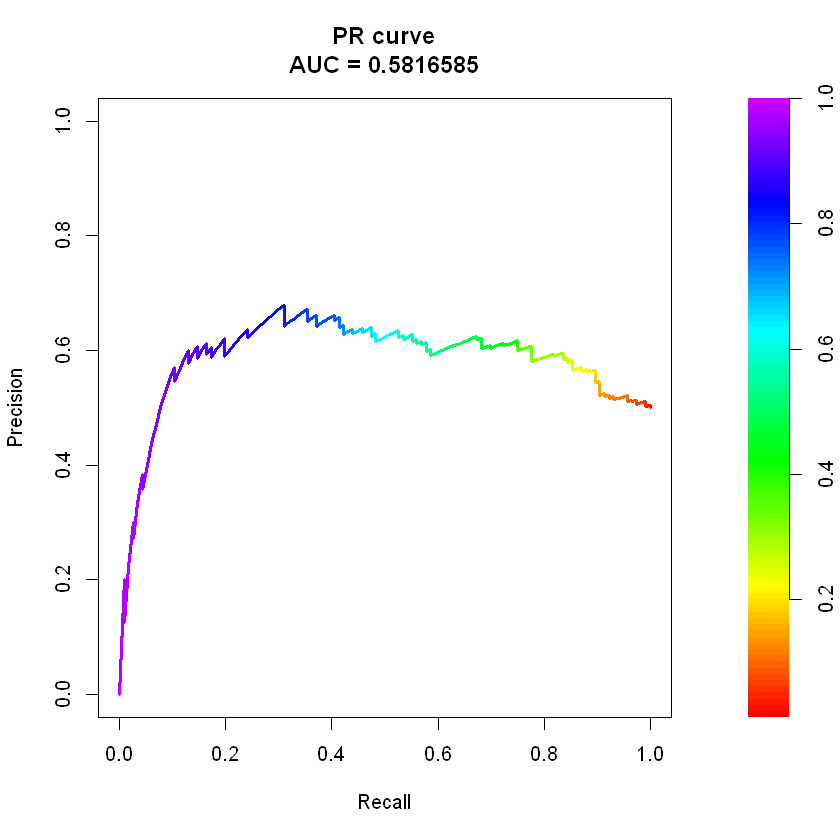

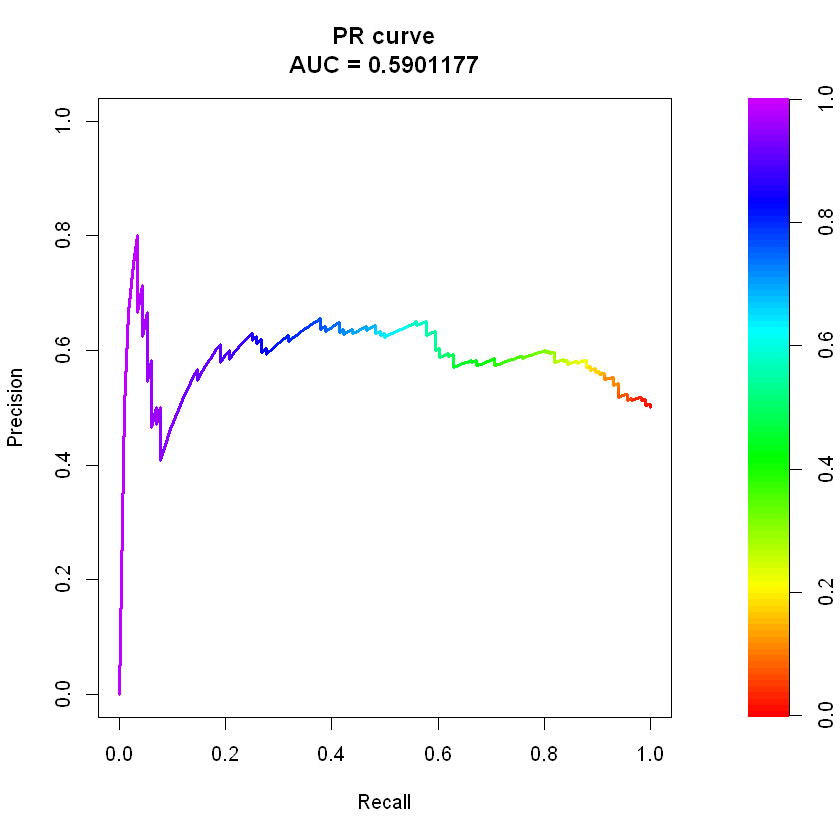

ERROR: Error in if (sum(weights < 0) != 0) {: Fehlender Wert, wo TRUE/FALSE nötig ist


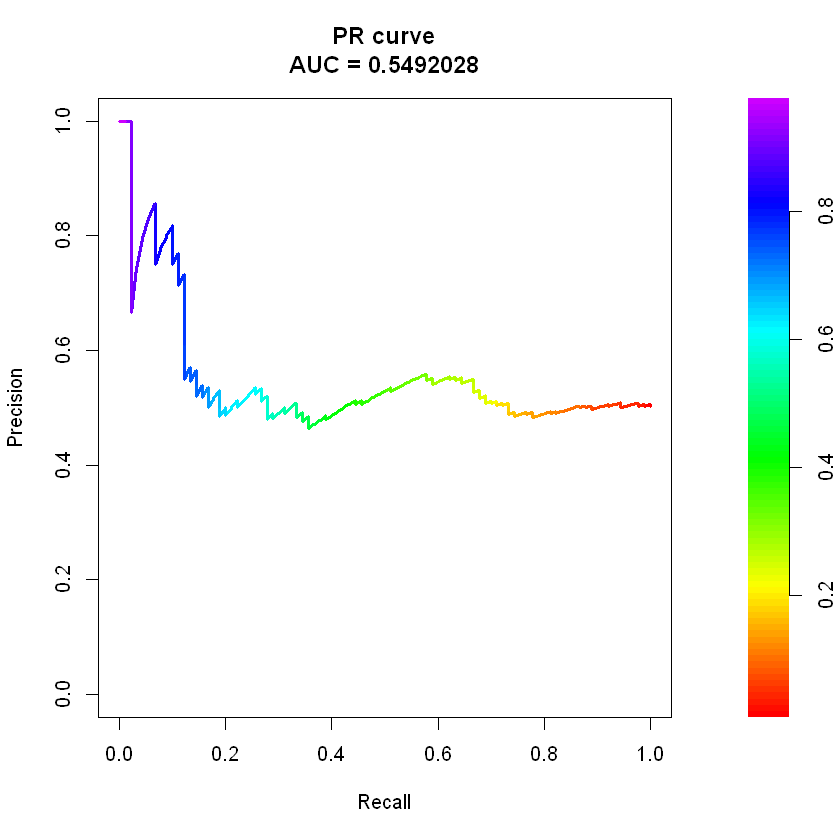

In [28]:
df_standard = read.csv("../Dataset/Text-Data/derstandard-folds.csv")

## load labels and cast to int
y_dat = df_standard["label"]
#y_dat_min2 = y_dat.astype(int)

## test data filter
filter_q_standard =  df_mod['ten_folds'] < 8 



dat = rp2_derstandard

pr = pr.curve(dat, weights.class0 = y_dat[filter_q_min2], curve = TRUE)
plot(pr)
write.table(file=paste("rp2_derstandard_transformed",sep=""),pr$curve,row.names = FALSE,col.names=FALSE,sep=",")


dat = rp3_derstandard
pr = pr.curve(dat, weights.class0 = y_dat[filter_q_min2], curve = TRUE)
plot(pr)
write.table(file=paste("rp3_derstandard_transformed",sep=""),pr$curve,row.names = FALSE,col.names=FALSE,sep=",")



dat = rpmod_derstandard
pr = pr.curve(dat, weights.class0 = y_dat[filter_q_min2], curve = TRUE)
plot(pr)
write.table(file=paste("rpmod_derstandard_transformed",sep=""),pr$curve,row.names = FALSE,col.names=FALSE,sep=",")



dat = derstandard_derstandard
pr = pr.curve(dat, weights.class0 = y_dat[filter_q_min2], curve = TRUE)
plot(pr)
write.table(file=paste("derstandard_derstandard_transformed",sep=""),pr$curve,row.names = FALSE,col.names=FALSE,sep=",")





